In [ ]:
#install packages
!pip install fuzzywuzzy

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#others
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# read data
df = pd.read_csv('zomato_dataset.csv')

In [ ]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2          39.0   
1      Doner King            3.9              4.2          39.0   
2      Doner King            3.9              4.2          39.0   
3      Doner King            3.9              4.2          39.0   
4      Doner King            3.9              4.2          39.0   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0             0.0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1             0.0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2             0.0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3             0.0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4             0.0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER   84.0   249.0  
1  BESTSELLER   45.0   129.0  
2         NaN   39.0   189.0  
3  BESTSELLER   43.0   189.0  
4    MUST TRY   31.0   205.0

In [ ]:
# view dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103004 entries, 0 to 103003
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  103004 non-null  object 
 1   Dining Rating    76945 non-null   float64
 2   Delivery Rating  101866 non-null  float64
 3   Dining Votes     103003 non-null  float64
 4   Delivery Votes   103003 non-null  float64
 5   Cuisine          103003 non-null  object 
 6   Place Name       103003 non-null  object 
 7   City             103003 non-null  object 
 8   Item Name        103003 non-null  object 
 9   Best Seller      23335 non-null   object 
 10  Votes            103003 non-null  float64
 11  Prices           103003 non-null  float64
dtypes: float64(6), object(6)
memory usage: 9.4+ MB


In [ ]:
# check column names
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [ ]:
# alter column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# rename "votes" column
df = df.rename(columns={'votes': 'item_votes'})

In [ ]:
# check null values
df.isnull().sum()



restaurant_name        0
dining_rating      26059
delivery_rating     1138
dining_votes           1
delivery_votes         1
cuisine                1
place_name             1
city                   1
item_name              1
best_seller        79669
item_votes             1
prices                 1
dtype: int64

In [ ]:
# fill null values with 0
df["dining_rating"].fillna(0, inplace=True)
df["delivery_rating"].fillna(0, inplace=True)

In [ ]:
# check value counts
df["best_seller"].value_counts()

best_seller
BESTSELLER                  13980
MUST TRY                     3380
Not eligible for coupons     2342
CHEF'S SPECIAL               1550
SPICY                         986
Not on Pro                    554
NEW                           401
SEASONAL                       66
Eggless available              34
VEGAN                          25
FODMAP FRIENDLY                 9
GLUTEN FREE                     6
DAIRY FREE                      2
Name: count, dtype: int64

In [ ]:
# encode bestseller as 1, and others as 0
df['best_seller'] = np.where(df['best_seller'] == 'BESTSELLER', 1, 0)

In [ ]:
# check value counts after encoding
df["best_seller"].value_counts()


best_seller
0    89024
1    13980
Name: count, dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
# check null values after the changes
df.isnull().sum()


restaurant_name    0
dining_rating      0
delivery_rating    0
dining_votes       0
delivery_votes     0
cuisine            0
place_name         0
city               0
item_name          0
best_seller        0
item_votes         0
prices             0
dtype: int64

In [ ]:
# duplicate rows
df[df.duplicated()].head()

restaurant_name  dining_rating  delivery_rating  dining_votes  \
15      Doner King            3.9              4.2          39.0   
16      Doner King            3.9              4.2          39.0   
18      Doner King            3.9              4.2          39.0   
19      Doner King            3.9              4.2          39.0   
20      Doner King            3.9              4.2          39.0   

    delivery_votes    cuisine place_name        city  \
15             0.0  Fast Food   Malakpet   Hyderabad   
16             0.0  Fast Food   Malakpet   Hyderabad   
18             0.0  Fast Food   Malakpet   Hyderabad   
19             0.0  Fast Food   Malakpet   Hyderabad   
20             0.0  Fast Food   Malakpet   Hyderabad   

                      item_name  best_seller  item_votes  prices  
15          Platter Kebab Combo            1        84.0   249.0  
16  Special Platter Kebab Combo            1        27.0   279.0  
18     Special Doner Wrap Combo            0        31.0   205.0  
19       Chicken Tandoori Salad            0        39.0   189.0  
20            Chicken BBQ Salad            1        43.0   189.0

In [ ]:
# number of duplicate rows
df[df.duplicated()].shape[0]

20384

In [ ]:
# drop duplicates and check dataframe shape
df = df.drop_duplicates()
print(df.shape)

(82619, 12)


In [ ]:
# check value counts
df["restaurant_name"].value_counts()

restaurant_name
McDonald's                                          1492
FreshMenu                                           1011
Burger King                                          943
Pizza Hut                                            822
Domino's Pizza                                       757
La Pino'z Pizza                                      721
The Momoz Hub                                        670
Subway                                               653
Savoury Sea Shell                                    566
Raj Restaurant                                       525
Marky Momos                                          502
Capital Multi Cuisine Restaurant                     486
Kanha                                                484
Casa Blanca                                          481
KFC                                                  478
Harishankar Veg Restro                               448
Apoorva Delicacies                                   428
The Chinese Wok                                      376
Ritz Classic                                         375
Liza Restaurant                                      373
WOW! China                                           365
Wendy's Burgers                                      364
The Momo Factory                                     364
Agarwal Caterers                                     363
Babal Da Punjabi Dabha                               357
Roopali Veg                                          348
Chowman                                              338
Faasos - Wraps & Rolls                               336
Delhi Zaika                                          330
Samco                                                324
Prithvi Hotel                                        321
RK Pure Veg                                          314
Flavours Of China                                    300
A2B - Adyar Ananda Bhavan                            298
Aromas Cafe & Bistro                                 297
Onesta                                               295
Keventers - Milkshakes & Desserts                    294
WOW! Momo                                            293
Santosh Dhaba                                        292
Meat And Eat                                         290
Blue Nile                                            289
Ovenstory Pizza                                      288
Chote Nawab                                          288
Roti Ghar                                            287
Fayrouz                                              283
P. Bhagat Tarachand                                  281
Arham                                                280
KMS Hakkim Kalyana Biriyani                          279
Shree Marutinandan Kathiyawadi Restaurant            278
Thaal Kitchen                                        277
The Hazelnut Factory                                 271
Kim Ling Chinese Restaurant                          263
Ceylon Bake House                                    261
Cafe 555 & Aqeeq Restaurant                          256
NR - Navaratna Udupi Pure Veg                        251
Cream Craver                                         249
EatFit                                               248
Beijing Bites                                        248
Lassi Shop                                           247
Mr. Brown - Danbro                                   246
Mughlai Affair                                       245
Madhurima Veg                                        244
Jhakas Family Restaurant                             243
Mathsya                                              242
Tan-Sukh By Kanha                                    241
Shobhaa Only Veg                                     239
Chidambaram New Moorthy Cafe                         239
Mother's Kitchen                                     239
Lucky Multicuisine Restaurant                        238
UBQ by Barbeque Nation                             

In [ ]:
# Check for typos in restaurant names
def find_potential_typos(names, threshold=85, case_sensitive=False):
    unique_names = names.unique().tolist()
    potential_typos = {}

    for i in range(len(unique_names)):
        for j in range(i+1, len(unique_names)):
            name1 = unique_names[i]
            name2 = unique_names[j]
            if not case_sensitive:
                name1 = name1.lower()
                name2 = name2.lower()
            similarity = fuzz.ratio(name1, name2)
            if similarity > threshold:
                potential_typos[(unique_names[i], unique_names[j])] = similarity

    return potential_typos

# Find and print potential typos
potential_typos = find_potential_typos(df["restaurant_name"], threshold=85, case_sensitive=False)
print("Potential Typos:")
for names, similarity in potential_typos.items():
    print(f"Similarity: {similarity}% - Names: {names}")



Potential Typos:
Similarity: 88% - Names: ('Red Bucket Biryani', 'Bucket Biryani')
Similarity: 87% - Names: ('Santosh Dhaba', 'New Santosh Dhaba')
Similarity: 98% - Names: ('Kwality Wall\x92s Frozen Dessert and Ice Cream Shop', "Kwality Wall's Frozen Dessert And Ice Cream Shop")
Similarity: 100% - Names: ('Kwality Wall\x92s Frozen Dessert and Ice Cream Shop', 'Kwality Wall\x92s Frozen Dessert And Ice Cream Shop')
Similarity: 88% - Names: ('Akbar Fast Food', 'Ambaram Fast Food')
Similarity: 86% - Names: ('Redaan Restaurant', 'Shadaan Restaurant')
Similarity: 88% - Names: ('Redaan Restaurant', 'Rumaan Restaurant')
Similarity: 88% - Names: ('Sahara Family Restaurant', 'Jhakas Family Restaurant')
Similarity: 88% - Names: ('Liza Restaurant', 'Pakiza Restaurant')
Similarity: 88% - Names: ('The Pizza Unlimited', 'Pizza Unlimited')
Similarity: 94% - Names: ('Unlimited Pizza & Fast Food Corner', 'Unlimited Pizza and Fast Food Corner')
Similarity: 98% - Names: ('FPF  Coffee Wale Bhaiya', 'FPF Co

In [ ]:
# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

Cleaned DataFrame:
  restaurant_name  dining_rating  delivery_rating  dining_votes  \
0      Doner King            3.9              4.2          39.0   
1      Doner King            3.9              4.2          39.0   
2      Doner King            3.9              4.2          39.0   
3      Doner King            3.9              4.2          39.0   
4      Doner King            3.9              4.2          39.0   

   delivery_votes    cuisine place_name        city                 item_name  \
0             0.0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1             0.0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2             0.0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3             0.0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4             0.0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

   best_seller  item_votes  prices  
0            1        84.0   249.0  
1            1   

In [ ]:
# cross check restaurants with similar names
df[df["restaurant_name"].isin(['Santosh Dhaba', 'New Santosh Dhaba'])].iloc[[0, -1]]

restaurant_name  dining_rating  delivery_rating  dining_votes  \
4021       Santosh Dhaba            4.3              3.9           0.0   
14596  New Santosh Dhaba            4.2              3.7         209.0   

       delivery_votes    cuisine    place_name        city  \
4021              0.0   Desserts         Abids   Hyderabad   
14596             0.0  Beverages  Begum Bazaar   Hyderabad   

                  item_name  best_seller  item_votes  prices  
4021   Paneer Butter Masala            1       281.0   300.0  
14596     All Cool Beverage            0         0.0    30.0

In [ ]:
df[df["restaurant_name"].isin(['Pizza@99', 'Pizza@89'])].iloc[[0, -1]]

restaurant_name  dining_rating  delivery_rating  dining_votes  \
92772        Pizza@99            0.0              3.2           0.0   
92847        Pizza@99            0.0              3.2           0.0   

       delivery_votes    cuisine   place_name        city  \
92772           578.0  Fast Food  Rajajinagar   Bangalore   
92847           578.0  Fast Food  Rajajinagar   Bangalore   

                                   item_name  best_seller  item_votes  prices  
92772  Chicken Corn Delight Pizza [7 inches]            0         0.0   190.0  
92847         Chicken Spring Roll [2 Pieces]            0        11.0   120.0

In [ ]:
# check value counts
df["city"].value_counts()

city
 Hyderabad       12746
 Mumbai          11420
 Chennai         10931
 Jaipur          10799
 Bangalore        9223
 Ahmedabad        8352
 Pune             6525
 Kochi            6065
 Lucknow          2384
 Goa              2227
 Kolkata          1737
 Banaswadi          85
 Ulsoor             54
 Magrath Road       40
 Malleshwaram       31
Name: count, dtype: int64

In [ ]:
# change city names
df['city'] = df['city'].str.replace('Banaswadi|Ulsoor|Magrath Road|Malleshwaram', 'Bangalore', regex=True)

In [ ]:
# strip empty space in "city"
df['city'] = df['city'].str.strip()


In [ ]:
# check value counts after changes
df["city"].value_counts()


city
Hyderabad    12746
Mumbai       11420
Chennai      10931
Jaipur       10799
Bangalore     9433
Ahmedabad     8352
Pune          6525
Kochi         6065
Lucknow       2384
Goa           2227
Kolkata       1737
Name: count, dtype: int64

<ipython-input-36-9560954dc13d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=restaurant_city_counts, x='city', palette='viridis')


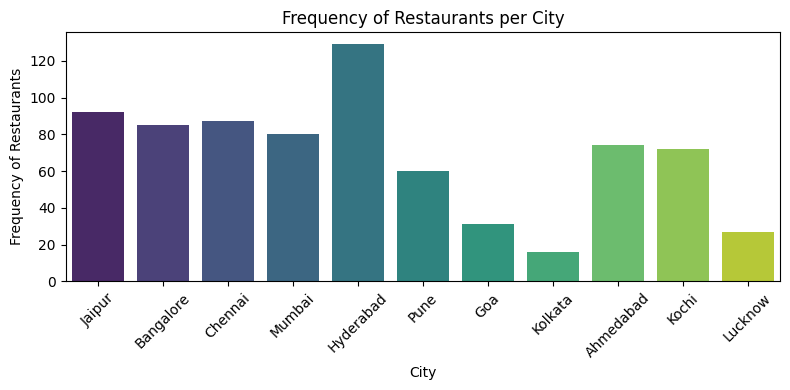

In [ ]:
# CITY ANALYSIS
# group by unique restaurants in each city
restaurant_city_counts = df.groupby('restaurant_name')['city'].value_counts().sort_values(ascending=False).reset_index(name='frequency')

# set plot size
plt.figure(figsize=(8,4))

# plot countplot
sns.countplot(data=restaurant_city_counts, x='city', palette='viridis')

# add labels and title
plt.title('Frequency of Restaurants per City')
plt.xlabel('City')
plt.ylabel('Frequency of Restaurants')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.tight_layout()
plt.savefig('1.1.png')

# show the plot
plt.show()

In [ ]:
# calculate total_votes from dining_votes, delivery_votes, item_votes
df["total_votes"] = df["dining_votes"] + df["delivery_votes"] + df["item_votes"]

<ipython-input-38-b14483ee4639>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_votes, x='city', y='total_votes', palette='viridis')


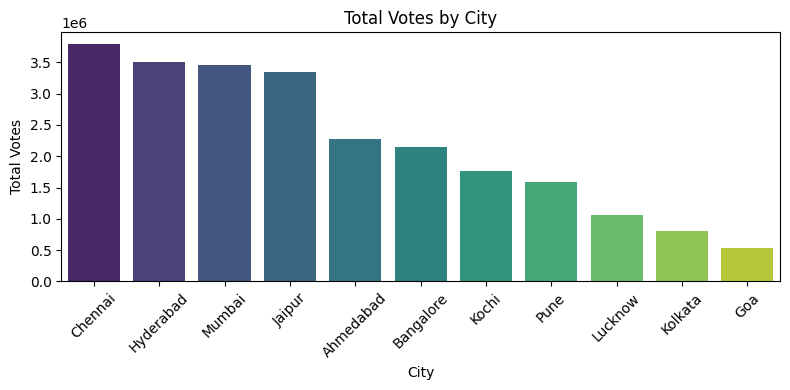

In [ ]:
# group by city
city_votes = df.groupby('city')['total_votes'].sum().sort_values(ascending=False).reset_index()

# set plot size
plt.figure(figsize=(8,4))

# plot barplot
sns.barplot(data=city_votes, x='city', y='total_votes', palette='viridis')

# add labels and title
plt.title('Total Votes by City')
plt.xlabel('City')
plt.ylabel('Total Votes')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.tight_layout()
plt.savefig('1.2.png')

# show the plot
plt.show()



In [ ]:
#CUISINE ANALYSIS
# filter data for Chennai city
df_chennai = df[df['city'] == 'Chennai']


<ipython-input-40-dfe77ba2003c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_value_counts.index, y=cuisine_value_counts.values, palette='viridis')


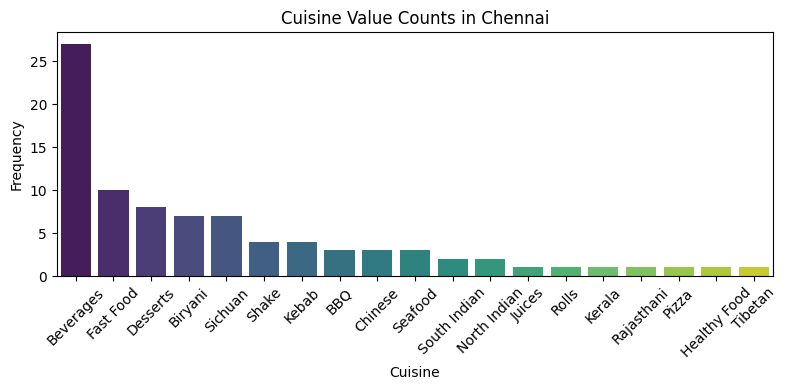

In [ ]:
# group by restaurant name and cuisine
chennai_cuisine_counts = df_chennai.groupby(['restaurant_name', 'cuisine']).size().reset_index(name='frequency')
cuisine_value_counts = chennai_cuisine_counts['cuisine'].value_counts()

# set plot size
plt.figure(figsize=(8, 4))

# plot barplot
sns.barplot(x=cuisine_value_counts.index, y=cuisine_value_counts.values, palette='viridis')

# add labels and title
plt.title('Cuisine Value Counts in Chennai')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.tight_layout()
plt.savefig('2.1.png')

# show the plot
plt.show()




In [ ]:
# display restaurant names for each cuisine
df_chennai[df_chennai['cuisine'] == 'Kebab'].groupby('restaurant_name').first()


dining_rating  delivery_rating  dining_votes  \
restaurant_name                                                    
Ibrahim Biriyani              3.8              4.0          41.0   
Shawarma Kings                0.0              4.0           0.0   
Taste Of Turkey               0.0              4.3           0.0   
The Kati Roll Shop            4.2              4.0         422.0   

                    delivery_votes cuisine       place_name     city  \
restaurant_name                                                        
Ibrahim Biriyani               0.0   Kebab          Kilpauk  Chennai   
Shawarma Kings                 0.0   Kebab  Anna Nagar East  Chennai   
Taste Of Turkey              258.0   Kebab      George Town  Chennai   
The Kati Roll Shop             0.0   Kebab      Gopalapuram  Chennai   

                                   item_name  best_seller  item_votes  prices  \
restaurant_name                                                                 
Ibrahim Biriyani          Chicken 65 Biryani            1       110.0   160.0   
Shawarma Kings      Classic Chicken Shawarma            1        76.0   105.0   
Taste Of Turkey             Barbeque Chicken            0         0.0   299.0   
The Kati Roll Shop         Anda Chicken Roll            1       162.0   199.0   

                    total_votes  
restaurant_name                  
Ibrahim Biriyani          151.0  
Shawarma Kings             76.0  
Taste Of Turkey           258.0  
The Kati Roll Shop        584.0

In [ ]:
# check the food item for each restaurant
df_chennai[(df_chennai['restaurant_name'] == "Ibrahim Biriyani")][["restaurant_name", "item_name"]]



restaurant_name           item_name
29887  Ibrahim Biriyani  Chicken 65 Biryani
29888  Ibrahim Biriyani     Chicken Biryani
29889  Ibrahim Biriyani      Mutton Biryani
29890  Ibrahim Biriyani         Egg Biryani
29891  Ibrahim Biriyani       Plain Biryani
29894  Ibrahim Biriyani       Plain Biryani

In [ ]:
# Example: Remove outliers based on z-score
from scipy import stats

df = df[(np.abs(stats.zscore(df[['dining_rating', 'delivery_rating', 'prices']])) < 3).all(axis=1)]
# Example: Remove outliers based on z-score
from scipy import stats

df = df[(np.abs(stats.zscore(df[['dining_rating', 'delivery_rating', 'prices']])) < 3).all(axis=1)]


In [ ]:
# Adding mock latitude and longitude columns for demonstration
# Replace this with actual latitude and longitude data
np.random.seed(42)
df['latitude'] = np.random.uniform(low=12.0, high=13.0, size=len(df))
df['longitude'] = np.random.uniform(low=77.0, high=78.0, size=len(df))
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="restaurant_name", hover_data=["city"],
                        color="best_seller", zoom=10, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.show()



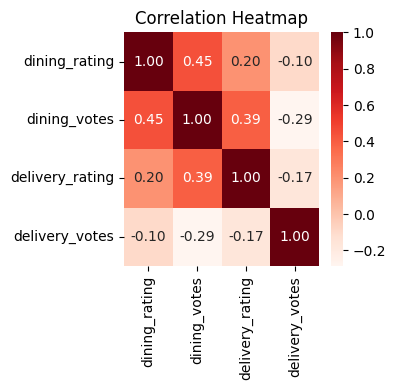

In [ ]:
# plot heatmap between 'dining_rating', 'dining_votes', 'delivery_rating', 'delivery_votes'

# select the columns
correlation_data = df_chennai[['dining_rating', 'dining_votes', 'delivery_rating', 'delivery_votes']]

# calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# set plot size
plt.figure(figsize=(4, 4))

# create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")

# add title
plt.title('Correlation Heatmap')

# save the plot
plt.tight_layout()
plt.savefig('3.1.png')

# show the plot
plt.show()


In [ ]:
# count the number of zeros in each column
num_zeros_dining_rating = (df_chennai['dining_rating'] == 0).sum()
num_zeros_delivery_rating = (df_chennai['delivery_rating'] == 0).sum()
num_zeros_dining_votes = (df_chennai['dining_votes'] == 0).sum()
num_zeros_delivery_votes = (df_chennai['delivery_votes'] == 0).sum()

# print the results
print(f'Number of zeros in dining_rating: {num_zeros_dining_rating}')
print(f'Number of zeros in dining_votes: {num_zeros_dining_votes}')
print(f'Number of zeros in delivery_rating: {num_zeros_delivery_rating}')
print(f'Number of zeros in delivery_votes: {num_zeros_delivery_votes}')


Number of zeros in dining_rating: 1902
Number of zeros in dining_votes: 2529
Number of zeros in delivery_rating: 0
Number of zeros in delivery_votes: 7981


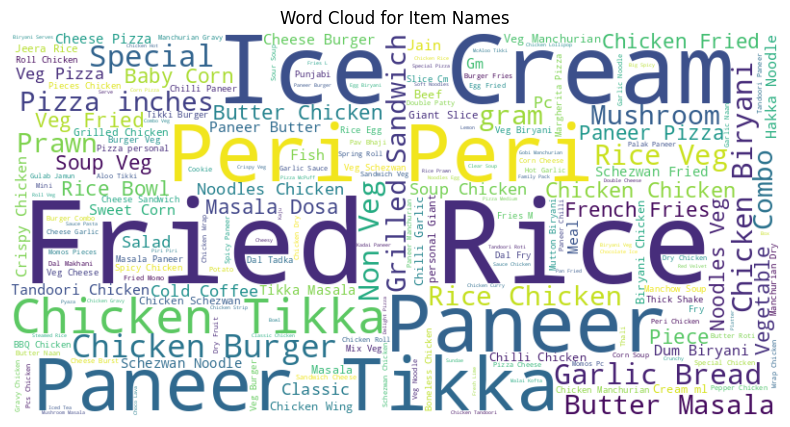

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for item names
text = ' '.join(df['item_name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Item Names')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
X = df[['dining_rating', 'delivery_rating', 'total_votes', 'prices']]
y = df['best_seller']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     21172
           1       0.38      0.20      0.26      2378

    accuracy                           0.89     23550
   macro avg       0.65      0.58      0.60     23550
weighted avg       0.86      0.89      0.87     23550

